<h1>💵 CAR SALES 🚗</h1>

<h2>🪟 Background (Latar Belakang)</h2>

Sebagai platform jual-beli mobil bekas, kami ingin:

- Meningkatkan kualitas rekomendasi harga

- Menemukan pola harga berdasarkan kondisi dan spesifikasi kendaraan

- Menyediakan prediksi harga jual yang adil & kompetitif

<h2>📝 Objective (Pertanyaan Bisnis yang Harus Dijawab)</h2>

1. Apa saja faktor utama yang memengaruhi harga mobil bekas?
Apakah tahun pembuatan, merek, kondisi, dan odometer paling berpengaruh?
Bagaimana efek jenis transmisi atau jenis bodi?

2. Apakah ada perbedaan preferensi atau harga di tiap negara bagian (state)?
Misalnya: mobil SUV mungkin lebih laku di Texas dibandingkan di California?

3. Bagaimana hubungan antara kondisi mobil dan odometer dengan harga pasar?
Apakah mobil dengan kondisi “excellent” tetap bisa turun harga kalau odometernya tinggi?

4. Apakah ada brand atau model tertentu yang mempertahankan nilai jual lebih baik dari lainnya?
Ini penting untuk strategi investasi atau rekomendasi ke pembeli.

5. Apakah mungkin kita memprediksi kisaran harga jual yang adil untuk mobil tertentu berdasarkan data historis?
Buat prototype model prediksi harga (regresi)

<h2>🔎 Details</h2>

- year
The manufacturing year of the vehicle.

- make
The brand or manufacturer of the vehicle.

- model
The specific model of the vehicle.

- trim
dditional designation for the vehicle model.

- body
The body type of the vehicle (e.g., SUV, Sedan).

- transmission
The type of transmission in the vehicle (e.g., automatic).

- vin
Vehicle Identification Number, a unique code for each vehicle.

- state
The state where the vehicle is registered.

- condition
Condition of the vehicle, possibly rated on a scale.

- odometer
The mileage or distance traveled by the vehicle.

- seller
The entity selling the vehicle.

- mmr
Manheim Market Report, possibly indicating the estimated market value of the vehicle.

- sellingprice
The price at which the vehicle was sold.

- saledate
The date and time when the vehicle was sold.

Import Dependencies

In [3]:
import pandas as pd
import numpy as np
# from datetime import datetime as dt
from dateutil import parser

import matplotlib.pyplot as plt
import seaborn as sns

import os

pd.set_option("display.max_columns", None)

In [4]:
df = pd.read_csv("dataset/car_prices.csv")
df.head(10)

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,kia motors america inc,20500.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,kia motors america inc,20800.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,45.0,1331.0,gray,black,financial services remarketing (lease),31900.0,30000.0,Thu Jan 15 2015 04:30:00 GMT-0800 (PST)
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,41.0,14282.0,white,black,volvo na rep/world omni,27500.0,27750.0,Thu Jan 29 2015 04:30:00 GMT-0800 (PST)
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,43.0,2641.0,gray,black,financial services remarketing (lease),66000.0,67000.0,Thu Dec 18 2014 12:30:00 GMT-0800 (PST)
5,2015,Nissan,Altima,2.5 S,Sedan,automatic,1n4al3ap1fn326013,ca,1.0,5554.0,gray,black,enterprise vehicle exchange / tra / rental / t...,15350.0,10900.0,Tue Dec 30 2014 12:00:00 GMT-0800 (PST)
6,2014,BMW,M5,Base,Sedan,automatic,wbsfv9c51ed593089,ca,34.0,14943.0,black,black,the hertz corporation,69000.0,65000.0,Wed Dec 17 2014 12:30:00 GMT-0800 (PST)
7,2014,Chevrolet,Cruze,1LT,Sedan,automatic,1g1pc5sb2e7128460,ca,2.0,28617.0,black,black,enterprise vehicle exchange / tra / rental / t...,11900.0,9800.0,Tue Dec 16 2014 13:00:00 GMT-0800 (PST)
8,2014,Audi,A4,2.0T Premium Plus quattro,Sedan,automatic,wauffafl3en030343,ca,42.0,9557.0,white,black,audi mission viejo,32100.0,32250.0,Thu Dec 18 2014 12:00:00 GMT-0800 (PST)
9,2014,Chevrolet,Camaro,LT,Convertible,automatic,2g1fb3d37e9218789,ca,3.0,4809.0,red,black,d/m auto sales inc,26300.0,17500.0,Tue Jan 20 2015 04:00:00 GMT-0800 (PST)


EDA

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558837 entries, 0 to 558836
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          558837 non-null  int64  
 1   make          548536 non-null  object 
 2   model         548438 non-null  object 
 3   trim          548186 non-null  object 
 4   body          545642 non-null  object 
 5   transmission  493485 non-null  object 
 6   vin           558833 non-null  object 
 7   state         558837 non-null  object 
 8   condition     547017 non-null  float64
 9   odometer      558743 non-null  float64
 10  color         558088 non-null  object 
 11  interior      558088 non-null  object 
 12  seller        558837 non-null  object 
 13  mmr           558799 non-null  float64
 14  sellingprice  558825 non-null  float64
 15  saledate      558825 non-null  object 
dtypes: float64(4), int64(1), object(11)
memory usage: 68.2+ MB


In [6]:
df.isnull().sum()

year                0
make            10301
model           10399
trim            10651
body            13195
transmission    65352
vin                 4
state               0
condition       11820
odometer           94
color             749
interior          749
seller              0
mmr                38
sellingprice       12
saledate           12
dtype: int64

In [7]:
df.duplicated().sum()

np.int64(0)

Cleaning Data / Preprocessing Data

In [8]:
# delete null value
df.dropna(inplace=True)


In [9]:
# mengecek duplikasi pada kolom vin 'vehicle identification number'
df.duplicated(subset='vin').sum()

np.int64(6557)

In [10]:
# mengahpus duplikasi value pada kolom vin dengan menyimpan nilai pertamanya
df = df.drop_duplicates(subset='vin', keep='first')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 465768 entries, 0 to 558836
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          465768 non-null  int64  
 1   make          465768 non-null  object 
 2   model         465768 non-null  object 
 3   trim          465768 non-null  object 
 4   body          465768 non-null  object 
 5   transmission  465768 non-null  object 
 6   vin           465768 non-null  object 
 7   state         465768 non-null  object 
 8   condition     465768 non-null  float64
 9   odometer      465768 non-null  float64
 10  color         465768 non-null  object 
 11  interior      465768 non-null  object 
 12  seller        465768 non-null  object 
 13  mmr           465768 non-null  float64
 14  sellingprice  465768 non-null  float64
 15  saledate      465768 non-null  object 
dtypes: float64(4), int64(1), object(11)
memory usage: 60.4+ MB


In [12]:
df.head(5)

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,kia motors america inc,20500.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,kia motors america inc,20800.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,45.0,1331.0,gray,black,financial services remarketing (lease),31900.0,30000.0,Thu Jan 15 2015 04:30:00 GMT-0800 (PST)
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,41.0,14282.0,white,black,volvo na rep/world omni,27500.0,27750.0,Thu Jan 29 2015 04:30:00 GMT-0800 (PST)
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,43.0,2641.0,gray,black,financial services remarketing (lease),66000.0,67000.0,Thu Dec 18 2014 12:30:00 GMT-0800 (PST)


In [13]:
# change saledate to the correct foramat
df['saledate'] = df['saledate'].apply(lambda x:parser.parse(x).strftime('%Y%m%d'))

df.head(5)

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,kia motors america inc,20500.0,21500.0,20141216
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,kia motors america inc,20800.0,21500.0,20141216
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,45.0,1331.0,gray,black,financial services remarketing (lease),31900.0,30000.0,20150115
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,41.0,14282.0,white,black,volvo na rep/world omni,27500.0,27750.0,20150129
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,43.0,2641.0,gray,black,financial services remarketing (lease),66000.0,67000.0,20141218


In [14]:
df['saledate'] = pd.to_datetime(df['saledate'], format='%Y%m%d')
df.head(5)

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,kia motors america inc,20500.0,21500.0,2014-12-16
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,kia motors america inc,20800.0,21500.0,2014-12-16
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,45.0,1331.0,gray,black,financial services remarketing (lease),31900.0,30000.0,2015-01-15
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,41.0,14282.0,white,black,volvo na rep/world omni,27500.0,27750.0,2015-01-29
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,43.0,2641.0,gray,black,financial services remarketing (lease),66000.0,67000.0,2014-12-18


In [15]:
# memperbaiki penulisan persentase value

df['condition'] = np.where(df['condition']<10, df['condition']*10, df['condition'])

df.head(5)

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,50.0,16639.0,white,black,kia motors america inc,20500.0,21500.0,2014-12-16
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,50.0,9393.0,white,beige,kia motors america inc,20800.0,21500.0,2014-12-16
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,45.0,1331.0,gray,black,financial services remarketing (lease),31900.0,30000.0,2015-01-15
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,41.0,14282.0,white,black,volvo na rep/world omni,27500.0,27750.0,2015-01-29
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,43.0,2641.0,gray,black,financial services remarketing (lease),66000.0,67000.0,2014-12-18


Penghapusan Variavel Tidak Relevan

In [16]:
# df = df.drop(columns='vin')

<h3>Objective 1</h3>

In [17]:
df_obj_1 = df.copy()

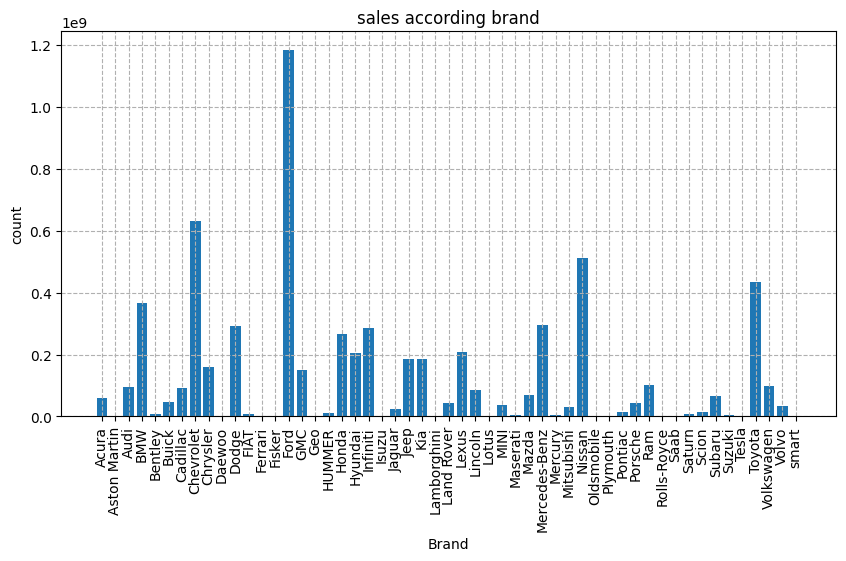

In [18]:
# total penjualan mobil berdasarkan brand
bar_obj_11 = df_obj_1.groupby('make')['sellingprice'].sum().reset_index()

plt.figure(figsize=(10,5))
plt.bar(bar_obj_11['make'],bar_obj_11['sellingprice'])
plt.xlabel("Brand")
plt.xticks(rotation=90)
plt.ylabel("count")
plt.grid(linestyle='--')
plt.title("sales according brand")
plt.show()

In [19]:
pivot1 = df_obj_1.pivot_table(
    index=['make'],
    values=['sellingprice'],
    aggfunc={'sum', 'count'}
)
pivot1.sort_values(ascending=False, by=('sellingprice','sum'))

sellingprice              
                     count           sum
make                                    
Ford                 79924  1.184222e+09
Chevrolet            53358  6.317898e+08
Nissan               43581  5.120138e+08
Toyota               34885  4.327928e+08
BMW                  17189  3.676770e+08
Mercedes-Benz        13739  2.940007e+08
Dodge                26770  2.934620e+08
Infiniti             13855  2.850568e+08
Honda                24472  2.673093e+08
Lexus                10261  2.079335e+08
Hyundai              18471  2.042993e+08
Kia                  15682  1.848436e+08
Jeep                 12512  1.841325e+08
Chrysler             14944  1.587500e+08
GMC                   9054  1.516944e+08
Ram                   3968  1.002750e+08
Volkswagen           10623  9.964595e+07
Audi                  4710  9.440758e+07
Cadillac              6180  9.110765e+07
Lincoln               4860  8.528306e+07
Mazda                 6833  6.995719e+07
Subaru                4315  6.729130e+07
Acura                 4438  5.807948e+07
Buick                 4400  4.660077e+07
Porsche               1132  4.440815e+07
Land Rover            1292  4.300283e+07
MINI                  2876  3.578825e+07
Volvo                 3031  3.319610e+07
Mitsubishi            3628  2.907413e+07
Jaguar                1235  2.410838e+07
Pontiac               3964  1.507448e+07
Scion                 1518  1.474840e+07
HUMMER                 735  1.126199e+07
Saturn                2525  8.615100e+06
Bentley                103  7.530400e+06
FIAT                   714  7.103677e+06
Mercury               1549  6.156900e+06
Maserati               106  4.701050e+06
Suzuki                 968  3.884195e+06
Rolls-Royce             16  2.455300e+06
Ferrari                 17  2.190500e+06
smart                  339  2.144050e+06
Tesla                   23  1.542250e+06
Saab                   409  1.478900e+06
Aston Martin            24  1.332000e+06
Fisker                   9  4.181500e+05
Lamborghini              3  3.345000e+05
Isuzu                  177  3.099750e+05
Oldsmobile             316  3.004000e+05
Plymouth                16  1.895250e+05
Lotus                    1  4.080000e+04
Geo                     16  9.225000e+03
Daewoo                   2  9.000000e+02

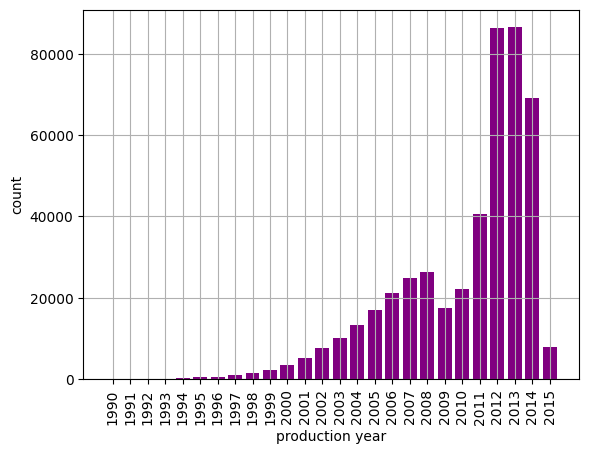

In [20]:
# banyaknya pembelian berdasarkan tahun keluaran mobil
bar_obj_12 = df_obj_1.groupby('year')['sellingprice'].count().reset_index()

plt.Figure(figsize=(12,6))
plt.bar(bar_obj_12['year'], bar_obj_12['sellingprice'], color='purple')

plt.xlabel("production year")
year = sorted(bar_obj_12['year'].unique())
plt.xticks(ticks=year, rotation=90)

plt.ylabel("count")
plt.grid()
plt.show()

In [21]:
# pembelian mobil berdasarkan kondisi mobil

# melakukan data binning terlebih dahulu untuk kolom condition

label = ['bad','normal','good']

df_obj_1['condition rank'] = pd.cut(df['condition'], bins=3,labels=label)

df_obj_1['condition rank'].value_counts()

condition rank
good      218133
normal    167504
bad        80131
Name: count, dtype: int64

([<matplotlib.patches.Wedge at 0x193066f9b50>,
 [Text(0.10926403000399114, 1.0945598986566643, 'good'),
  Text(-0.6568938211893866, -0.8823210910338743, 'normal'),
  Text(0.9432071888378604, -0.5660037092851788, 'bad')])

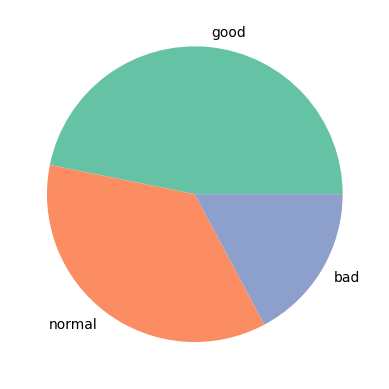

In [22]:
# visualisasi kolom kondisi
pallete_color = sns.color_palette('Set2')

plt.pie(df_obj_1['condition rank'].value_counts(),labels=['good','normal','bad'],colors=pallete_color)

In [24]:
df_obj_1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 465768 entries, 0 to 558836
Data columns (total 17 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   year            465768 non-null  int64         
 1   make            465768 non-null  object        
 2   model           465768 non-null  object        
 3   trim            465768 non-null  object        
 4   body            465768 non-null  object        
 5   transmission    465768 non-null  object        
 6   vin             465768 non-null  object        
 7   state           465768 non-null  object        
 8   condition       465768 non-null  float64       
 9   odometer        465768 non-null  float64       
 10  color           465768 non-null  object        
 11  interior        465768 non-null  object        
 12  seller          465768 non-null  object        
 13  mmr             465768 non-null  float64       
 14  sellingprice    465768 non-null  float64 

k-fold target encoding

In [27]:
# mencari fitur yang paling berpengaruh terhadap penjualan
from sklearn.model_selection import KFold

def target_mean_encoding_kfold(df, categorical_col, target_col, n_splits=10000):
    """_summary_

    Args:
        df (pd.dataframe): dataframe
        categorical_col (str): name categorical column to encode
        target_col (str): name of the target column
        n_splits (int): number of folds for cross validation
    
    return -> dataframe with target encoded column.
    """
    df_encoded = pd.Series(np.zeros(df.shape[0]), index = df.index)
    
    kf = KFold(n_splits=n_splits, shuffle=False)
    
    # loop trough each fold
    for train_index, val_index in kf.split(df):
        # split data into train and valid sets
        train_data, val_data = df.iloc[train_index], df.iloc[val_index]
        
        # calculate target mean on training data
        target_means = train_data.groupby(categorical_col)[target_col].mean()
        
        # apply the target mean to the validation data
        df_encoded.iloc[val_index] = val_data[categorical_col].map(target_means)
    
    # if any category were not seen in the training set, fill them with the global target mean
    global_mean = df[target_col].mean()
    df_encoded.fillna(global_mean, inplace=True)
    
    # returnthe original data framewith encoded column
    return df_encoded

In [34]:
# create copy
df_kfcv_tme = df_obj_1.copy()

# apply target mean encoding with k-fold cross-validation
df_kfcv_tme['make_ec'] = target_mean_encoding_kfold(df_kfcv_tme, 'make', 'sellingprice', n_splits=10000)

df_kfcv_tme.head()

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate,condition rank,make_ec
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,50.0,16639.0,white,black,kia motors america inc,20500.0,21500.0,2014-12-16,good,11780.664901
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,50.0,9393.0,white,beige,kia motors america inc,20800.0,21500.0,2014-12-16,good,11780.664901
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,45.0,1331.0,gray,black,financial services remarketing (lease),31900.0,30000.0,2015-01-15,good,21368.558421
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,41.0,14282.0,white,black,volvo na rep/world omni,27500.0,27750.0,2015-01-29,good,10913.504793
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,43.0,2641.0,gray,black,financial services remarketing (lease),66000.0,67000.0,2014-12-18,good,21368.558421


<h3>Objective 2</h3>

In [ ]:
df_obj_2 = df_obj_1.copy()
body_state = df_obj_2.groupby(['body','state'])['sellingprice'].count().sort_values(ascending=False).reset_index(name='count')

# plt.Figure(figsize=(10,6))
# plt.bar(df_obj_2['body'],)
state_count = body_state.loc[body_state.groupby('state')['count'].idxmax()]

,body,state,count
1001,SUV,al,7
35,Sedan,az,2662
1,Sedan,ca,25206
52,Sedan,co,1879
0,Sedan,fl,28942
5,Sedan,ga,11872
168,Sedan,hi,436
6,Sedan,il,9000
60,Sedan,in,1512
109,Sedan,la,719


ValueError: Invalid RGBA argument: 'body'

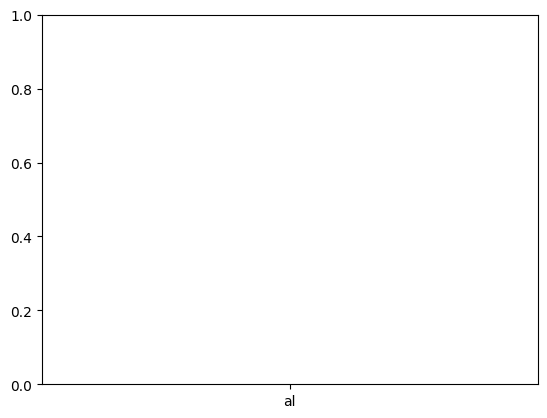

In [ ]:
plt.Figure(figsize=(10,5))
plt.bar(state_count['state'],state_count['count'],color=['body'])
plt.xlabel('State')
state = sorted(state_count['state'].unique())
plt.xticks(ticks=state, rotation=90)
plt.ylabel('count')
plt.grid()
plt.show()

In [ ]:
body_state.groupby(['body','state'])['sellingprice'].max().reset_index()

,body,state,sellingprice
0,Access Cab,az,6
1,Access Cab,ca,37
2,Access Cab,co,3
3,Access Cab,fl,36
4,Access Cab,ga,16
...,...,...,...
1615,wagon,wa,57
1616,wagon,wi,50
1617,xtracab,ca,2
1618,xtracab,ma,1


In [ ]:
body_state.pivot_table(
    index=['state','body'],
    values=['sellingprice'],
    aggfunc={max}
)

C:\Users\User\AppData\Local\Temp\ipykernel_15232\1988373707.py:1: FutureWarning: The provided callable <built-in function max> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  body_state.pivot_table(


sellingprice
                           max
state body                    
al    Coupe                  1
      Crew Cab               2
      CrewMax Cab            1
      G Sedan                1
      Minivan                1
...                        ...
wi    suv                  512
      transit van            1
      van                    7
      wagon                 50
      xtracab                1

[1620 rows x 1 columns]